In [34]:
import cv2 as cv 
import csv
import pandas as pd
import matplotlib.pyplot as plt
import keras
import glob
import math
import numpy as np

### If you want to receive the photos one by one

In [35]:
imagefiles = glob.glob("Dataset/pieces/*.jpg")
imagefiles.sort()

data = []
for filename in imagefiles:
    img = cv.imread(filename)
    data.append(img)

num_images = len(data)
num_images

11200

### You can also use the following code to get data

In [36]:
from numpy import load
# load dict of arrays
dict_data = load('Dataset/npz/nu_le/nu_le.npz')
# extract the first array
data = dict_data['arr_0']

### Receive labels

In [37]:
from numpy import load
# load dict of arrays
dict_data = load('Dataset/npz/nu_le/nu_le_label.npz', allow_pickle=True)
# extract the first array
label_ch = dict_data['arr_0']

dict_data = load('Dataset/npz/nu_le/nu_le_label_index.npz')
# extract the first array
label_no = dict_data['arr_0']

In [38]:
label_ch = pd.DataFrame(label_ch, columns=['label'])
label_ch.head()

,label
0,1
1,1
2,EIN
3,2
4,6


In [39]:
label_no = pd.DataFrame(label_no, columns=['label'])
label_no.head()

,label
0,1
1,1
2,19
3,2
4,6


In [40]:
label_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11200 entries, 0 to 11199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   11200 non-null  int32
dtypes: int32(1)
memory usage: 43.9 KB


## Show some sample data

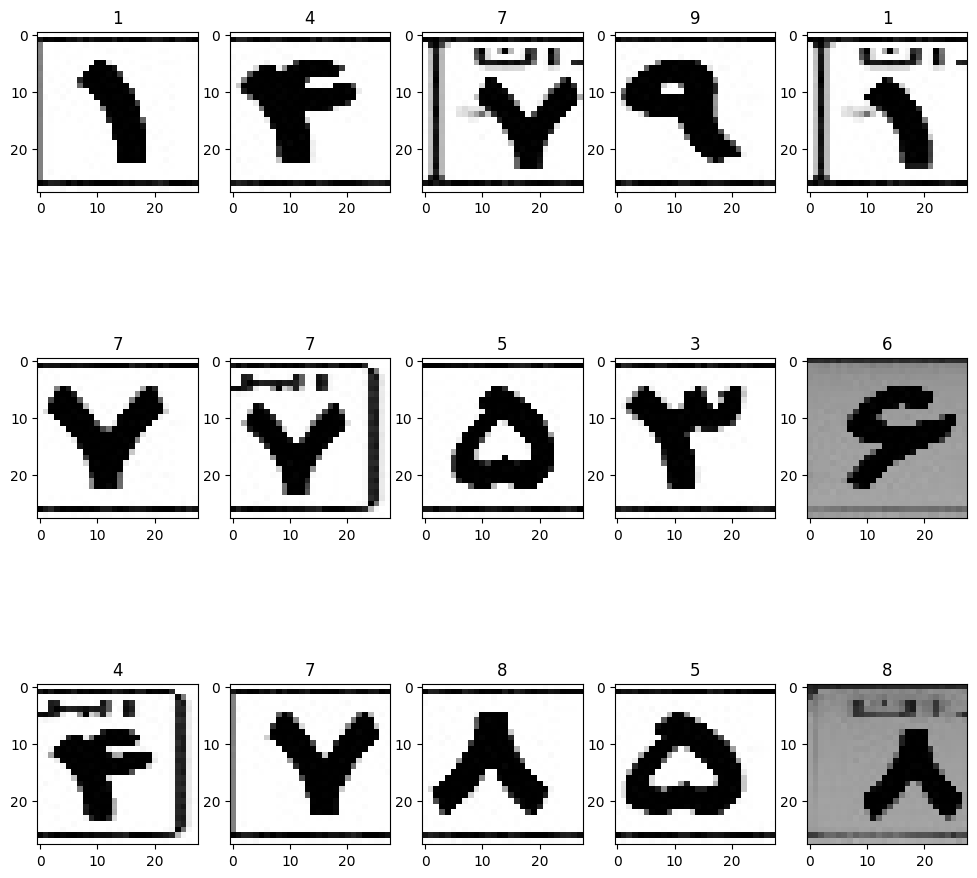

In [41]:
lst = [8,124,358,1200,1658,2478,3568,3900,4125,4265,5000,5321,5469,5846,5999,6400]
counter = 0
fig , ax = plt.subplots(3,5, figsize=(12,12))
for i in range(3):
    for j in range(5):
        ax[i][j].set_title(label_ch.iloc[lst[counter]].values[0])
        ax[i][j].imshow(data[lst[counter]])
        counter += 1

### train_test_split

In [42]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data,label_no, test_size=0.2, random_state=42)

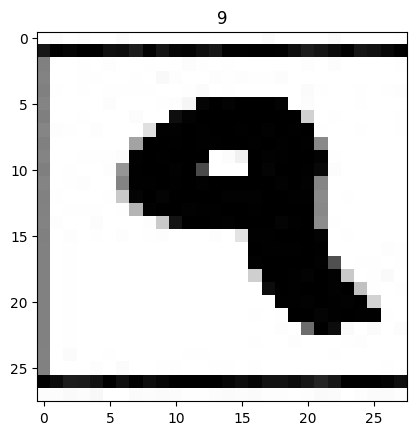

In [43]:
plt.imshow(xtrain[123])
plt.title(np.array(ytrain)[123][0]);

In [44]:
xtrain[123].shape

(28, 28, 3)

## Model

In [70]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28,3]))
model.add(keras.layers.Dense(350, activation = 'relu'))
model.add(keras.layers.Dense(150, activation = 'relu'))
model.add(keras.layers.Dense(26, activation = 'softmax'))

C:\Users\Shahab\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [71]:
model.compile(loss = 'sparse_categorical_crossentropy', 
             optimizer = 'adam', 
             metrics = ['accuracy'])

In [72]:
history = model.fit(xtrain, ytrain, epochs=10, validation_split = 0.15)

Epoch 1/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5361 - loss: 159.7432 - val_accuracy: 0.9821 - val_loss: 0.4152
Epoch 2/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9691 - loss: 0.6766 - val_accuracy: 0.8110 - val_loss: 11.0467
Epoch 3/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9683 - loss: 0.8902 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9982 - loss: 0.0281 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accurac

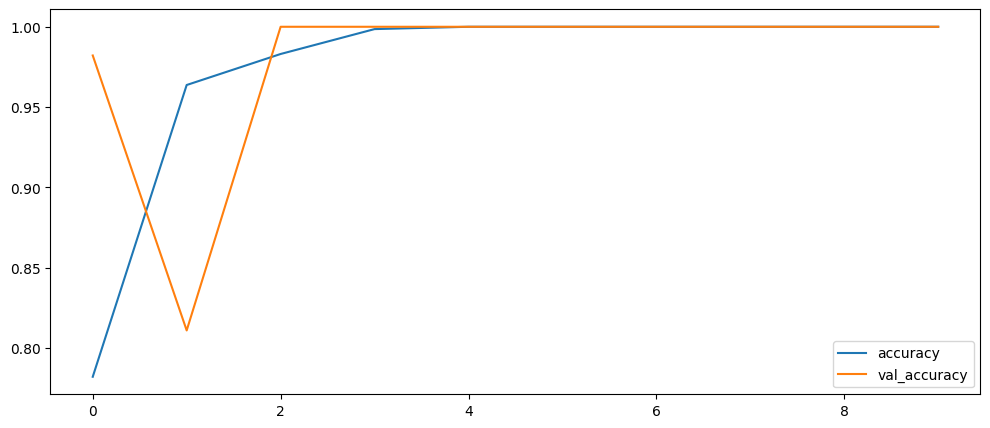

In [74]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(history.history['accuracy'], label='accuracy')
ax.plot(history.history['val_accuracy'], label='val_accuracy')
ax.legend()

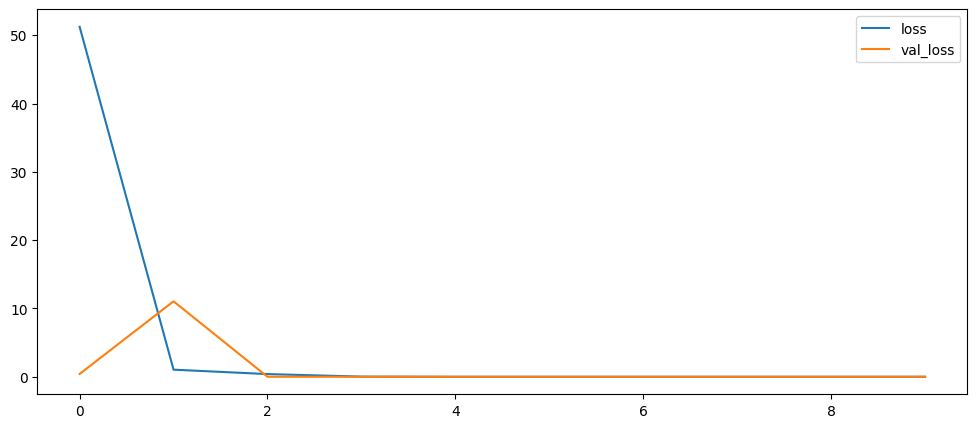

In [75]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(history.history['loss'], label='loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.legend()

### Predict

In [76]:
loss_accuracy = model.evaluate(xtest, ytest, verbose=0)
print('loss:', loss_accuracy[0])
print('accuracy:', loss_accuracy[1])

loss: 0.0
accuracy: 1.0


In [77]:
y_pred = model.predict(xtest)

y_predd = []
for i in range(len(y_pred)):
    y_predd.append(y_pred[i].argmax())

y_pred = np.array(y_predd)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00       213
           3       1.00      1.00      1.00       218
           4       1.00      1.00      1.00       205
           5       1.00      1.00      1.00       219
           6       1.00      1.00      1.00       215
           7       1.00      1.00      1.00       216
           8       1.00      1.00      1.00       213
           9       1.00      1.00      1.00       241
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        22
          15       1.00      1.00      1.00        29
          16       1.00      1.00      1.00        20
          17       1.00    

<Axes: >

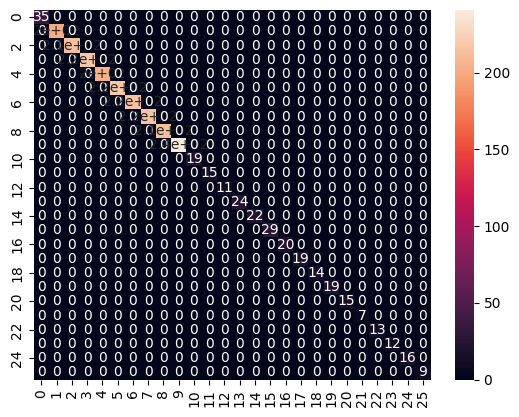

In [78]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import seaborn as sns

print(classification_report(ytest, y_pred))
sns.heatmap(confusion_matrix(y_pred, ytest), annot=True)

In [79]:
model.save('model_beta.h5')